In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
data = pd.read_csv("Workplace/INternships/Corcoran group/nyc-rolling-sales.csv")

In [51]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [52]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.0,84548.0,84548.0,84548.0,84548.0,84548.0,84548.0,84548.0,84548.0,84548.0
mean,10344.4,3.0,4237.2,376.2,10732.0,2.0,0.2,2.2,1789.3,1.7
std,7151.8,1.3,3568.3,658.1,1290.9,16.7,8.7,19.0,537.3,0.8
min,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,4231.0,2.0,1322.8,22.0,10305.0,0.0,0.0,1.0,1920.0,1.0
50%,8942.0,3.0,3311.0,50.0,11209.0,1.0,0.0,1.0,1940.0,2.0
75%,15987.2,4.0,6281.0,1001.0,11357.0,2.0,0.0,2.0,1965.0,2.0
max,26739.0,5.0,16322.0,9106.0,11694.0,1844.0,2261.0,2261.0,2017.0,4.0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

## Some self-thought without diving into the dataset

## Data Cleaning

In [54]:
# We have seen that there are a few - and blanks in places of actual values, so will replace them with np.nan
data=data.replace([' -  ',' '],np.nan)

In [55]:
data.columns[data.isnull().any()].tolist()

['TAX CLASS AT PRESENT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'APARTMENT NUMBER',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'SALE PRICE']

In [56]:
# Removing the null entries
# We first look at our target variable, SALE PRICE
data['SALE PRICE'].value_counts()

0           10228
10            766
450000        427
550000        416
650000        414
600000        409
700000        382
400000        378
750000        377
300000        351
500000        350
350000        345
800000        331
900000        324
250000        314
850000        309
950000        301
1100000       298
1200000       286
1300000       271
425000        265
475000        259
525000        259
325000        249
480000        233
1250000       229
625000        224
200000        223
460000        222
420000        217
            ...  
5088539         1
1316945         1
101500          1
1079910         1
2189000         1
1375400         1
871640          1
593250          1
12873554        1
266254          1
518888          1
2615270         1
607275          1
493430          1
408092          1
1414750         1
632333          1
305188          1
14291           1
265161          1
2624453         1
1182000         1
512737          1
294113          1
802381    

In [63]:
data[data['SALE PRICE']!='0']['SALE PRICE'].median()

625500.0

In [64]:
data['SALE PRICE']=data['SALE PRICE'].replace(['0',np.nan],'625500').astype('int')

In [21]:
data['TAX CLASS AT PRESENT'].isnull().sum()

738

In [72]:
data['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [73]:
# replace tax class null values with the most frequent tax class, here, 1
data['TAX CLASS AT PRESENT']=data['TAX CLASS AT PRESENT'].fillna('1')

In [74]:
data['TAX CLASS AT PRESENT'].value_counts()

1     39371
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [75]:
data['EASE-MENT'].isnull().sum()

84548

In [76]:
# okay, we will drop this column
data.drop(['EASE-MENT'],axis=1, inplace =True)

In [77]:
data['BUILDING CLASS AT PRESENT'].isnull().sum()

738

In [78]:
data['BUILDING CLASS AT PRESENT'].value_counts()

D4    12663
R4    12482
A1     6753
A5     5683
B2     4923
B1     4749
C0     4379
B3     3824
A2     2821
C6     2760
B9     1543
R3     1444
A9     1401
R1     1228
V0     1222
R9     1201
C3     1097
RG     1049
R2      926
C1      847
C2      816
S2      798
RB      471
A0      469
V1      455
A3      389
K1      361
S1      353
RS      350
C7      341
      ...  
Q9        4
V2        3
G3        3
O9        2
U1        2
R0        2
J8        2
W6        2
J5        2
U6        2
Y3        2
V6        2
H6        2
H9        2
Z3        2
L3        2
T2        2
I3        1
K8        1
J9        1
HH        1
Q8        1
CM        1
HS        1
Y1        1
R7        1
Z7        1
J1        1
P7        1
M2        1
Name: BUILDING CLASS AT PRESENT, Length: 166, dtype: int64

In [79]:
data['BUILDING CLASS AT PRESENT']=data['BUILDING CLASS AT PRESENT'].fillna('D4')

In [80]:
data['APARTMENT NUMBER'].isnull().sum()

65496

In [81]:
# okay, we will drop this column as well, as a major share of records are null
data.drop(['APARTMENT NUMBER'],axis=1, inplace =True)

In [82]:
data['LAND SQUARE FEET'].isnull().sum()

26252

In [86]:
data[data['LAND SQUARE FEET']!='0']['LAND SQUARE FEET'].median()

2500.0

In [87]:
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].fillna('2500').astype('int')

In [92]:
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].replace(0,data['LAND SQUARE FEET'].median())

In [93]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # DISABLING scientific notation

In [94]:
data.groupby('LAND SQUARE FEET', as_index=False)['SALE PRICE'].mean()

,LAND SQUARE FEET,SALE PRICE
0,2,625500.0
1,7,625500.0
2,13,625500.0
3,33,390000.0
4,60,625500.0
5,66,625500.0
6,73,625500.0
7,75,625500.0
8,88,625500.0
9,98,625500.0


In [95]:
data['GROSS SQUARE FEET'].isnull().sum()

27612

In [96]:
data[data['GROSS SQUARE FEET']!=0]['GROSS SQUARE FEET'].median()

1680.0

In [97]:
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].fillna('1680').astype('int')

In [98]:
data['GROSS SQUARE FEET'].value_counts()

1680      27758
0         11417
2400        386
1800        361
2000        359
1600        346
1440        340
3000        324
1200        295
1280        281
2200        256
2160        254
1400        241
3300        236
1224        226
1152        222
2700        220
2080        207
1120        203
1248        194
3600        192
1296        182
1344        179
1920        175
2100        174
1216        170
1260        169
2280        158
1360        157
1500        152
          ...  
14737         1
8560          1
6485          1
6357          1
70980         1
12368         1
12304         1
8150          1
662           1
8368          1
5268          1
17118         1
221208        1
3239          1
1046          1
9234          1
3031          1
7125          1
5076          1
9170          1
89293         1
15660         1
32932         1
21340         1
2903          1
57512         1
4948          1
4884          1
334581        1
3669          1
Name: GROSS SQUARE FEET,

In [99]:
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].replace(0,data['GROSS SQUARE FEET'].median())

In [102]:
# we will now look at columns having non-null values

In [103]:
# numeric columns
data.select_dtypes(include=[np.number]).columns

Index(['Unnamed: 0', 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

In [107]:
data.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [108]:
data['BOROUGH'].value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [111]:
data['ZIP CODE'].value_counts()

10314    1687
11354    1384
11201    1324
11235    1312
11234    1165
11375    1144
10312    1088
10306    1061
10023    1053
10011    1048
10022    1009
10016     987
0         982
10019     972
11355     932
11229     916
10025     914
11215     899
11238     858
10024     832
11207     823
11385     821
10003     812
11357     808
10128     794
11236     782
11221     759
11208     744
10021     740
11219     729
         ... 
10470     145
10032     143
11693     142
10035     137
11363     129
10453     119
10040     119
10034     111
10030      99
10039      96
10004      95
10454      95
10464      87
10452      86
10018      84
10455      81
11001      70
10474      69
10044      68
10037      63
11239      63
11040      42
10475      36
11109      31
10282      10
10105       5
10281       1
10167       1
10803       1
11430       1
Name: ZIP CODE, Length: 186, dtype: int64

In [112]:
# We cannot have zip code 0, so we will replace it with the most frequent zip code
data['ZIP CODE']=data['ZIP CODE'].replace(0,10314)

In [116]:
data['YEAR BUILT'].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
1950    3156
1960    2654
1940    2456
1931    2246
1955    1961
1899    1798
1901    1755
1935    1610
1965    1511
2015    1470
1945    1330
2014    1232
2007    1186
1915    1182
1900    1130
2005    1106
1970     952
1963     941
2008     935
2006     924
1962     839
2016     794
2013     743
1961     728
2004     715
        ... 
1894       5
1892       4
1845       4
1871       3
1852       3
1891       3
1854       3
1898       3
1875       3
1844       2
1865       2
1893       2
1889       2
1846       2
1856       2
1883       2
1851       2
1847       2
1882       2
1835       2
1840       2
1864       2
1680       1
1855       1
1826       1
1832       1
1849       1
1829       1
1111       1
1888       1
Name: YEAR BUILT, Length: 158, dtype: int64

In [117]:
# Year built cannot be 0, hence we replace it with the median.
data[data['YEAR BUILT']!=0]['YEAR BUILT'].median()

1945.0

In [118]:
data['YEAR BUILT']=data['YEAR BUILT'].replace(0,1945)

In [119]:
data['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [121]:
# Categorical variables
data.select_dtypes(include=['object']).columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'],
      dtype='object')

In [122]:
data['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH               3068
UPPER EAST SIDE (59-79)      1736
UPPER EAST SIDE (79-96)      1590
UPPER WEST SIDE (59-79)      1439
BEDFORD STUYVESANT           1436
MIDTOWN EAST                 1418
BOROUGH PARK                 1245
ASTORIA                      1216
BAYSIDE                      1150
FOREST HILLS                 1069
SHEEPSHEAD BAY               1013
UPPER WEST SIDE (79-96)      1004
JACKSON HEIGHTS               992
EAST NEW YORK                 982
FLUSHING-SOUTH                918
MIDTOWN WEST                  918
HARLEM-CENTRAL                847
FLATBUSH-EAST                 846
BAY RIDGE                     832
CHELSEA                       803
ELMHURST                      802
CROWN HEIGHTS                 793
CANARSIE                      783
GREAT KILLS                   776
BUSHWICK                      769
RICHMOND HILL                 749
REGO PARK                     721
PARK SLOPE                    706
GRAVESEND                     705
TRIBECA       

In [123]:
data.groupby('NEIGHBORHOOD', as_index=False)['SALE PRICE'].mean()

,NEIGHBORHOOD,SALE PRICE
0,AIRPORT LA GUARDIA,602126.2
1,ALPHABET CITY,2058155.2
2,ANNADALE,627210.6
3,ARDEN HEIGHTS,423981.8
4,ARROCHAR,587298.3
5,ARROCHAR-SHORE ACRES,487839.2
6,ARVERNE,444398.6
7,ASTORIA,1002410.7
8,BATH BEACH,772476.3
9,BATHGATE,771803.7


In [124]:
# can be a good feature

In [127]:
data['ADDRESS'].value_counts()

131-05 40TH   ROAD                 210
429 KENT AVENUE                    158
169 WEST 95TH   STREET             153
131-03 40TH   ROAD                 147
265 STATE STREET                   127
550 VANDERBILT AVENUE              126
50 WEST STREET                     115
39TH   AVENUE                      108
30 PARK PLACE                      107
1809 EMMONS AVENUE                 103
389 EAST 89TH   STREET              94
136-21 LATIMER PLACE                91
171 WEST 131 STREET                 89
56 LEONARD STREET                   86
102 WEST END AVENUE                 85
140 WEST STREET                     82
90 FURMAN STREET                    81
205 EAST 45TH   STREET              79
13 EAST 11TH   STREET               78
959 1 AVENUE                        76
2211 BROADWAY                       74
866 UNITED NATIONS PLAZA            74
416 WEST 52ND STREET                70
330 EAST 38TH STREET                63
31-35 31ST   STREET                 60
102 WEST 57TH STREET     

In [128]:
# lot of values, cannot effect much
data.drop(['ADDRESS'], axis=1, inplace =True)

In [131]:
data.drop(['SALE DATE'],axis=1, inplace =True)

In [132]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE'],
      dtype='object')

## Multivariable Analysis, Data Encoding, Visualizations

In [138]:
#Numeric variables
data.select_dtypes(include=[np.number]).columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'SALE PRICE'],
      dtype='object')

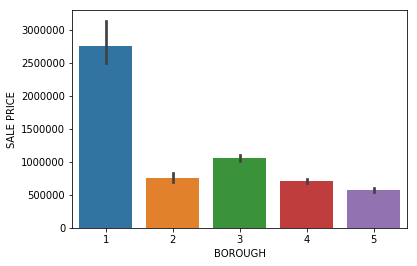

In [134]:
sns.barplot(x='BOROUGH',y='SALE PRICE',data=data)

In [136]:
# Looking at this, we can actually put 2,4, and 5 as one category, here, we put 2
data['BOROUGH']=data['BOROUGH'].replace([2,4,5],2)

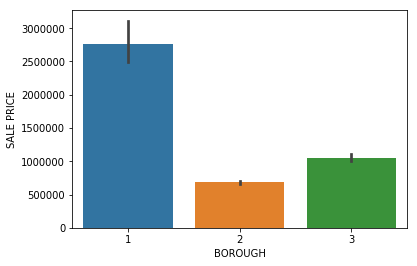

In [141]:
sns.barplot(x='BOROUGH',y='SALE PRICE',data=data)

In [142]:
len(data['BLOCK'].unique())

11566

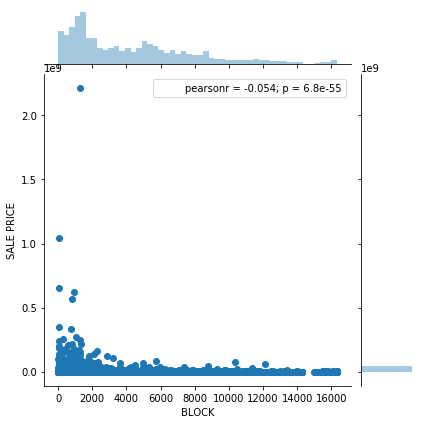

In [145]:
sns.jointplot(x='BLOCK',y='SALE PRICE',data=data)

In [146]:
# a lot of blocks, so we will later see this feature

In [147]:
len(data['LOT'].unique())

2627

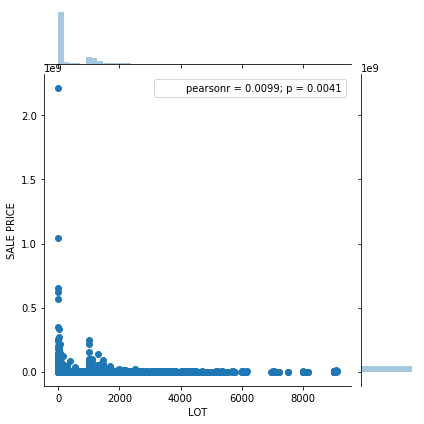

In [149]:
sns.jointplot(x='LOT',y='SALE PRICE',data=data)

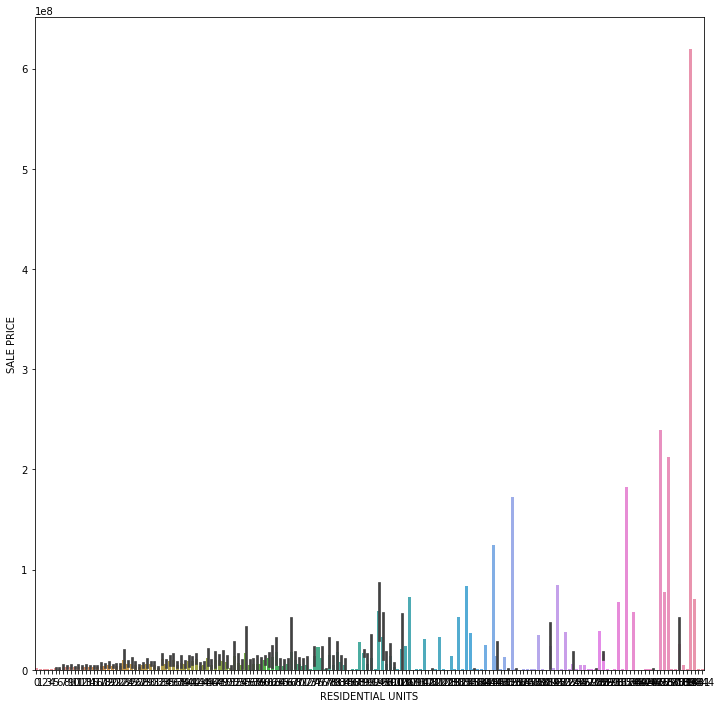

In [157]:
plt.figure(figsize=(12,12))
sns.barplot(x='RESIDENTIAL UNITS',y='SALE PRICE',data=data)

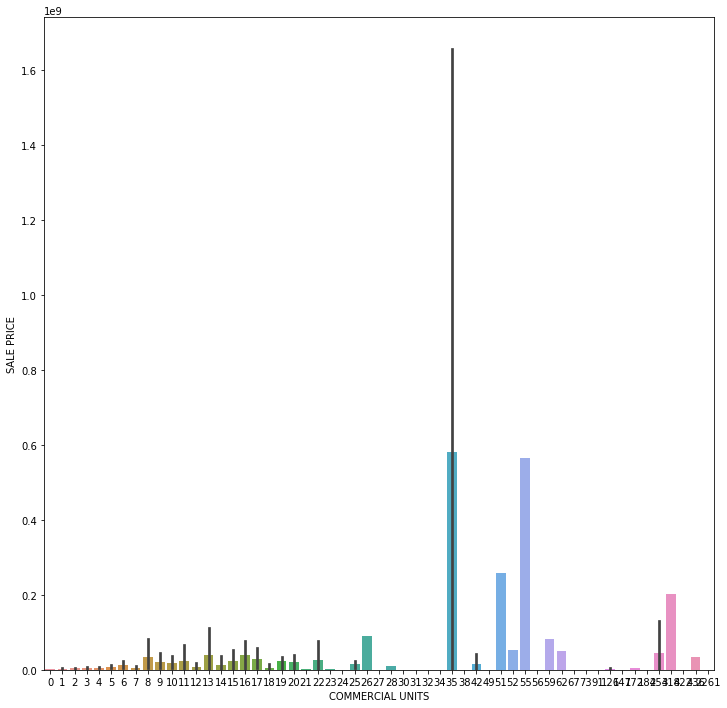

In [158]:
plt.figure(figsize=(12,12))
sns.barplot(x='COMMERCIAL UNITS',y='SALE PRICE',data=data)

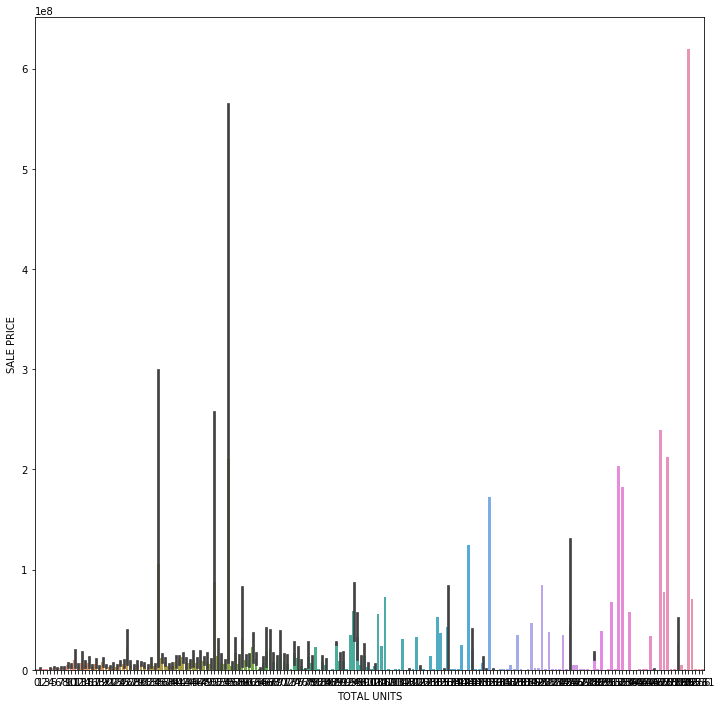

In [159]:
plt.figure(figsize=(12,12))
sns.barplot(x='TOTAL UNITS',y='SALE PRICE',data=data)

In [161]:
# commercial units looks like a better feature than the other two, as the others have some significant outliers

In [163]:
# land square feet, gross square feet

In [173]:
data['RESIDENTIAL UNITS']=data['RESIDENTIAL UNITS'].replace(0,1)

In [175]:
data['TOTAL UNITS']=data['RESIDENTIAL UNITS']+data['COMMERCIAL UNITS']

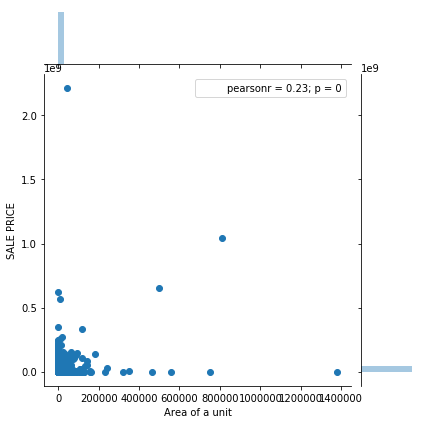

In [176]:
# area of 1 unit = gross square feet/total units
data['Area of a unit']=data['GROSS SQUARE FEET']/data['TOTAL UNITS']

# price of 1 unit = sale price/total units
data['Price of a unit']=data['SALE PRICE']/data['TOTAL UNITS']

In [178]:
# Age of the property
data['Age']=2017-data['YEAR BUILT']

In [179]:
data.groupby('Age', as_index=False)['SALE PRICE'].mean()

,Age,SALE PRICE
0,0,666250.0
1,1,907786.2
2,2,1435268.1
3,3,2167089.7
4,4,2840483.9
5,5,4267511.6
6,6,852688.2
7,7,1691220.4
8,8,1911827.2
9,9,2054841.0


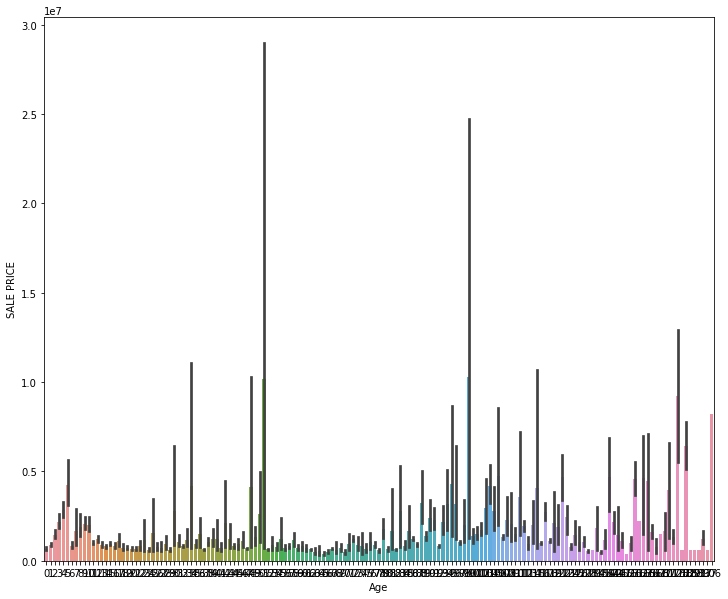

In [181]:
plt.figure(figsize=(12,10))
sns.barplot(x='Age',y='SALE PRICE',data=data)

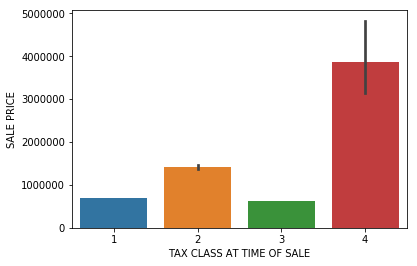

In [182]:
sns.barplot(x='TAX CLASS AT TIME OF SALE',y='SALE PRICE',data=data)

In [187]:
data['TAX CLASS AT TIME OF SALE']=data['TAX CLASS AT TIME OF SALE'].replace(3,1)

In [188]:
len(data['TAX CLASS AT TIME OF SALE'].unique())

3

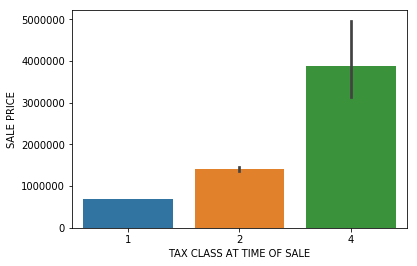

In [189]:
sns.barplot(x='TAX CLASS AT TIME OF SALE',y='SALE PRICE',data=data)

In [190]:
len(data['LAND SQUARE FEET'].unique())

6060

In [193]:
# Categorical variables
data.select_dtypes(include=['object']).columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'],
      dtype='object')

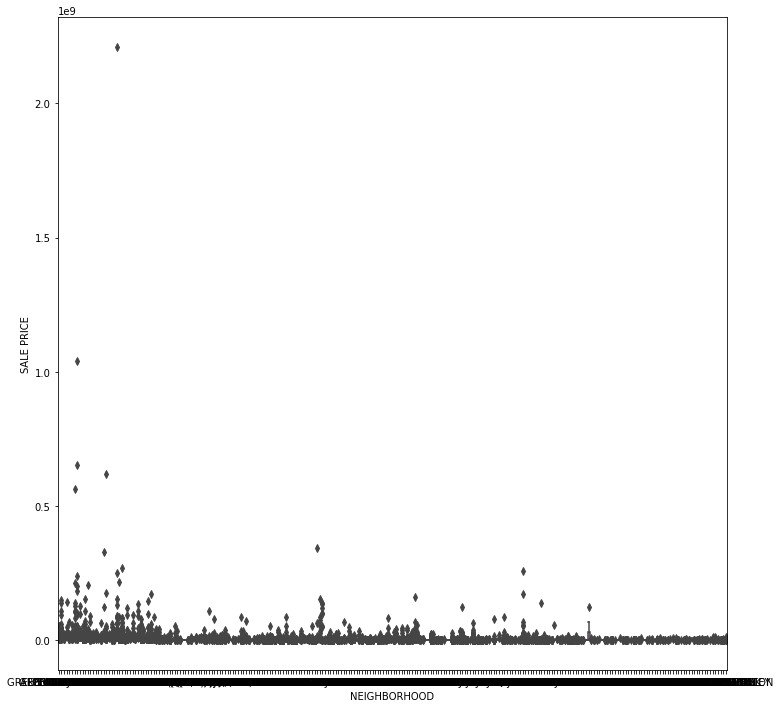

In [196]:
plt.figure(figsize=(12,12))
sns.boxplot(x='NEIGHBORHOOD',y='SALE PRICE',data=data)

In [197]:
# Neighborhood doesn't look like a siginificant feature in imppacting the sale price

In [199]:
data['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

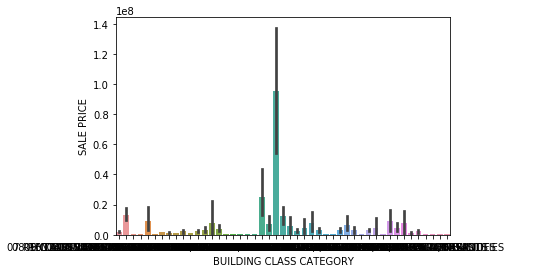

In [198]:
sns.barplot(x='BUILDING CLASS CATEGORY',y='SALE PRICE',data=data)

In [209]:
data['BUILDING CLASS CATEGORY NEW']=data['BUILDING CLASS CATEGORY'].apply(lambda x:x.split()[1])

In [210]:
map_buildingClassCategory = {
    "ASYLUMS":"HOSPITAL","HOSPITAL":"HOSPITAL","COMMERCIAL":"COMMERCIAL","STORE":"COMMERCIAL","OFFICE":"COMMERCIAL",
    "WAREHOUSES":"COMMERCIAL","FACTORIES":"COMMERCIAL","ONE":"DWELLINGS","TWO":"DWELLINGS","THREE":"DWELLINGS",
    "COOPS":"DWELLINGS","CONDO":"DWELLINGS","CONDOS":"DWELLINGS","CONDO-RENTALS":"DWELLINGS","RENTALS":"DWELLINGS",
    "LOFT":"DWELLINGS","EDUCATION":"EDUCATION","INDOOR":"PUBLIC","OUTDOOR":"PUBLIC","RELIGIOUS":"PUBLIC",
    "TRANSPORTATION":"PUBLIC","THEATRES":"PUBLIC","SELECTED":"OTHER","OTHER":"OTHER","TAX":"OTHER","SPECIAL":"OTHER",
    "LUXURY":"LUXURY"
}
data['BUILDING CLASS CATEGORY NEW']=data['BUILDING CLASS CATEGORY NEW'].map(map_buildingClassCategory)

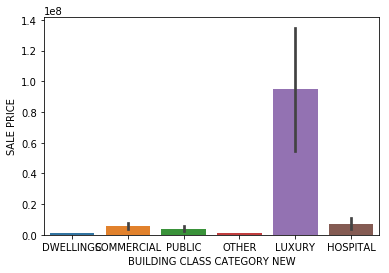

In [211]:
sns.barplot(x='BUILDING CLASS CATEGORY NEW',y='SALE PRICE',data=data)

In [212]:
# DOESN'T LOOK LIKE A SIGNIFICANT FEATURE, EXCEPT FOR LUXURY CATEGORY WHICH SETS ITSEFL APART WHILE THE REST LOOK IN THE SAME RANGE

In [213]:
data['TAX CLASS AT PRESENT'].unique()

array(['2A', '2', '2B', '2C', '1', '4', '1C', '3', '1A', '1B'], dtype=object)

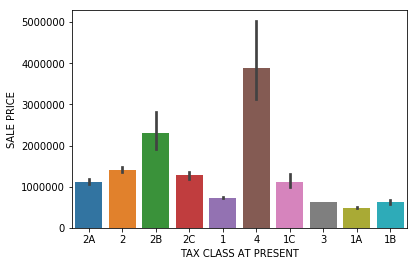

In [214]:
sns.barplot(x='TAX CLASS AT PRESENT',y='SALE PRICE',data=data)

In [216]:
data['TAX CLASS AT PRESENT']=data['TAX CLASS AT PRESENT'].replace(['2A','2B','2C'],'2')
data['TAX CLASS AT PRESENT']=data['TAX CLASS AT PRESENT'].replace(['1A','1B','1C'],'1')

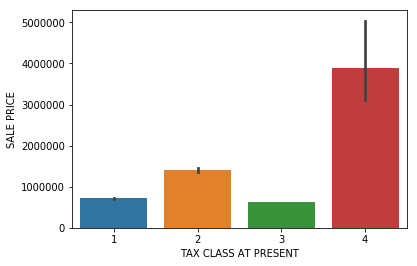

In [217]:
sns.barplot(x='TAX CLASS AT PRESENT',y='SALE PRICE',data=data)

In [218]:
data['TAX CLASS AT PRESENT']=data['TAX CLASS AT PRESENT'].replace('3','1')

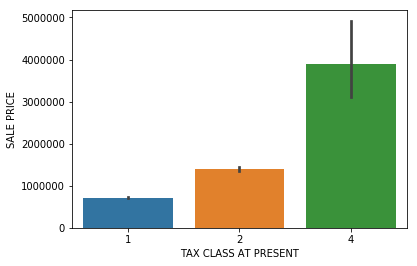

In [219]:
sns.barplot(x='TAX CLASS AT PRESENT',y='SALE PRICE',data=data)

In [220]:
# we made it the same as tax class at time of sale

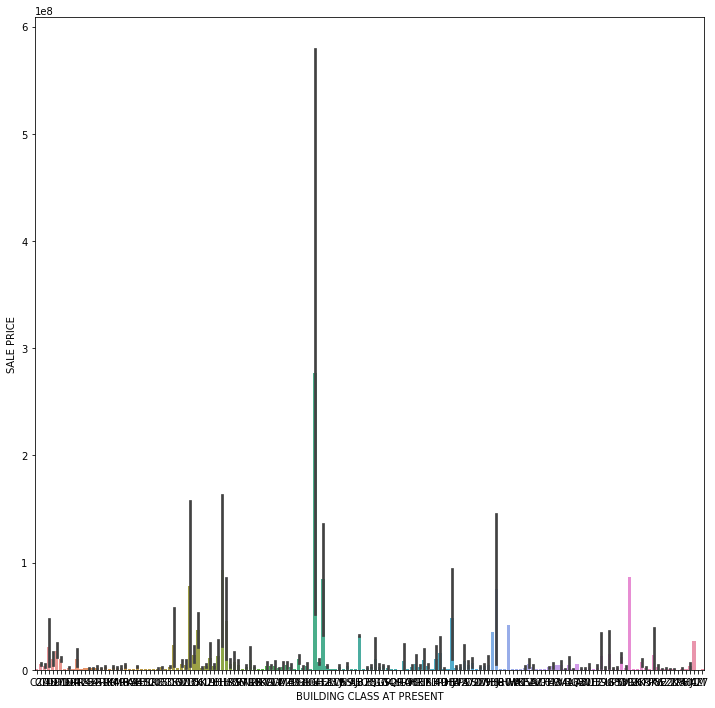

In [223]:
plt.figure(figsize=(12,12))
sns.barplot(x='BUILDING CLASS AT PRESENT',y='SALE PRICE',data=data)

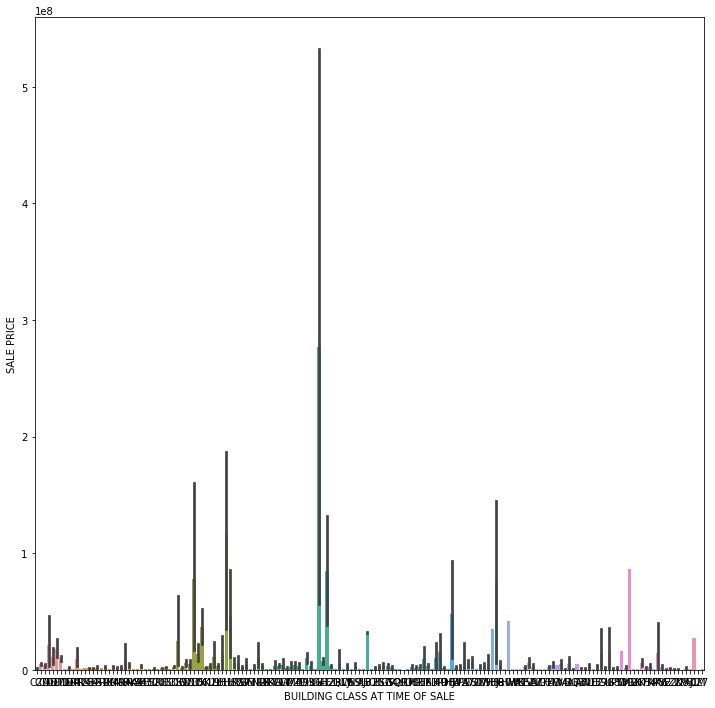

In [224]:
plt.figure(figsize=(12,12))
sns.barplot(x='BUILDING CLASS AT TIME OF SALE',y='SALE PRICE',data=data)

In [226]:
data['BUILDING CLASS AT PRESENT']=data['BUILDING CLASS AT PRESENT'].apply(lambda x:list(x)[0])

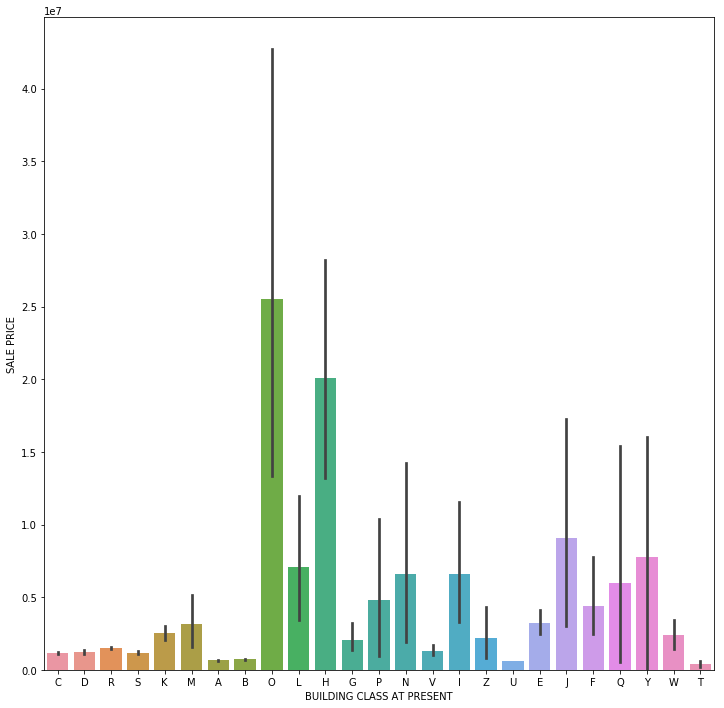

In [227]:
plt.figure(figsize=(12,12))
sns.barplot(x='BUILDING CLASS AT PRESENT',y='SALE PRICE',data=data)

In [228]:
data['BUILDING CLASS AT TIME OF SALE']=data['BUILDING CLASS AT TIME OF SALE'].apply(lambda x:list(x)[0])

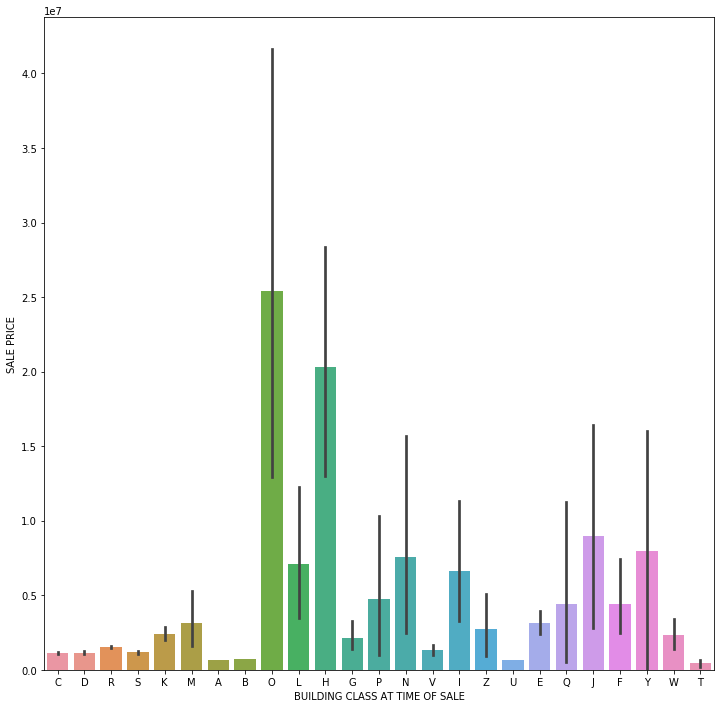

In [229]:
plt.figure(figsize=(12,12))
sns.barplot(x='BUILDING CLASS AT TIME OF SALE',y='SALE PRICE',data=data)

In [233]:
# The above 2 plots also, tax plots look the same, so we will take only one from each pair of plots.
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE

In [234]:
data.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Area of a unit,Price of a unit,Age
BOROUGH,1.0,0.3,-0.2,0.7,-0.0,-0.0,-0.0,0.0,-0.0,-0.1,-0.2,-0.1,-0.0,-0.1,0.1
BLOCK,0.3,1.0,-0.2,0.5,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.3,-0.1,-0.0,-0.1,0.0
LOT,-0.2,-0.2,1.0,-0.2,-0.0,-0.0,-0.0,-0.0,-0.0,0.4,0.3,0.0,0.0,0.1,-0.4
ZIP CODE,0.7,0.5,-0.2,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.2,-0.1,-0.0,-0.1,0.1
RESIDENTIAL UNITS,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.9,0.4,0.7,-0.0,0.0,0.1,-0.0,-0.0,0.0
COMMERCIAL UNITS,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.5,0.0,0.1,-0.0,0.0,0.0,0.0,-0.0,0.0
TOTAL UNITS,-0.0,-0.0,-0.0,-0.0,0.9,0.5,1.0,0.4,0.6,-0.0,0.0,0.1,-0.0,-0.0,0.0
LAND SQUARE FEET,0.0,0.0,-0.0,-0.0,0.4,0.0,0.4,1.0,0.5,0.0,0.1,0.1,0.1,0.1,-0.0
GROSS SQUARE FEET,-0.0,-0.0,-0.0,-0.0,0.7,0.1,0.6,0.5,1.0,0.0,0.1,0.3,0.5,0.2,-0.0
YEAR BUILT,-0.1,-0.0,0.4,-0.1,-0.0,-0.0,-0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.0,-1.0


In [237]:
data['BUILDING CLASS CATEGORY NEW']=data['BUILDING CLASS CATEGORY NEW'].replace(['DWELLINGS','COMMERCIAL','OTHER','HOSPITAL','PUBLIC'],'NON-LUXURY')

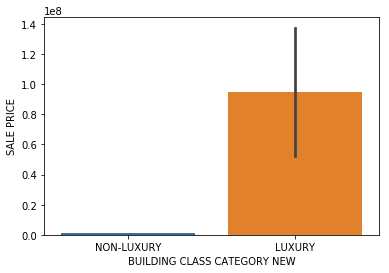

In [238]:
sns.barplot(x='BUILDING CLASS CATEGORY NEW',y='SALE PRICE',data=data)

In [239]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'Area of a unit', 'Price of a unit', 'Age',
       'BUILDING CLASS CATEGORY NEW'],
      dtype='object')

In [240]:
# label encode tax class at time of sale, tax class at present, building class category new

In [242]:
# label encoding this column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['TaxClassTimeOfSale_ENC']=labelencoder.fit_transform(data['TAX CLASS AT TIME OF SALE'])
data['TaxClassPres_ENC']=labelencoder.fit_transform(data['TAX CLASS AT PRESENT'])

In [247]:
data['BuildClassCategory_ENC']=data['BUILDING CLASS CATEGORY NEW']

In [248]:
data['BuildClassCategory_ENC']=data['BuildClassCategory_ENC'].replace('NON-LUXURY',0)
data['BuildClassCategory_ENC']=data['BuildClassCategory_ENC'].replace('LUXURY',1)

In [249]:
data['BuildClassCategory_ENC'].value_counts()

0.0    84467
1.0       12
Name: BuildClassCategory_ENC, dtype: int64

In [250]:
data = pd.concat([data, pd.get_dummies(data['BUILDING CLASS AT TIME OF SALE'], prefix = "BuildClassTimeOfSale", prefix_sep='_')], axis=1)

In [252]:
data.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,...,BuildClassTimeOfSale_P,BuildClassTimeOfSale_Q,BuildClassTimeOfSale_R,BuildClassTimeOfSale_S,BuildClassTimeOfSale_T,BuildClassTimeOfSale_U,BuildClassTimeOfSale_V,BuildClassTimeOfSale_W,BuildClassTimeOfSale_Y,BuildClassTimeOfSale_Z
BOROUGH,1.0,0.3,-0.2,0.7,-0.0,-0.0,-0.0,0.0,-0.0,-0.1,...,0.0,-0.0,-0.2,0.1,0.0,-0.0,0.0,0.0,-0.0,0.0
BLOCK,0.3,1.0,-0.2,0.5,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.3,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
LOT,-0.2,-0.2,1.0,-0.2,-0.0,-0.0,-0.0,-0.0,-0.0,0.4,...,-0.0,-0.0,0.8,-0.1,-0.0,-0.0,-0.1,-0.0,-0.0,-0.0
ZIP CODE,0.7,0.5,-0.2,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,...,0.0,-0.0,-0.2,0.1,-0.0,-0.0,-0.0,0.0,-0.0,0.0
RESIDENTIAL UNITS,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.9,0.4,0.7,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
COMMERCIAL UNITS,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.5,0.0,0.1,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.1,0.0,-0.0
TOTAL UNITS,-0.0,-0.0,-0.0,-0.0,0.9,0.5,1.0,0.4,0.6,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
LAND SQUARE FEET,0.0,0.0,-0.0,-0.0,0.4,0.0,0.4,1.0,0.5,0.0,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
GROSS SQUARE FEET,-0.0,-0.0,-0.0,-0.0,0.7,0.1,0.6,0.5,1.0,0.0,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
YEAR BUILT,-0.1,-0.0,0.4,-0.1,-0.0,-0.0,-0.0,0.0,0.0,1.0,...,-0.0,-0.0,0.4,-0.1,0.0,-0.0,-0.0,-0.0,-0.0,-0.0


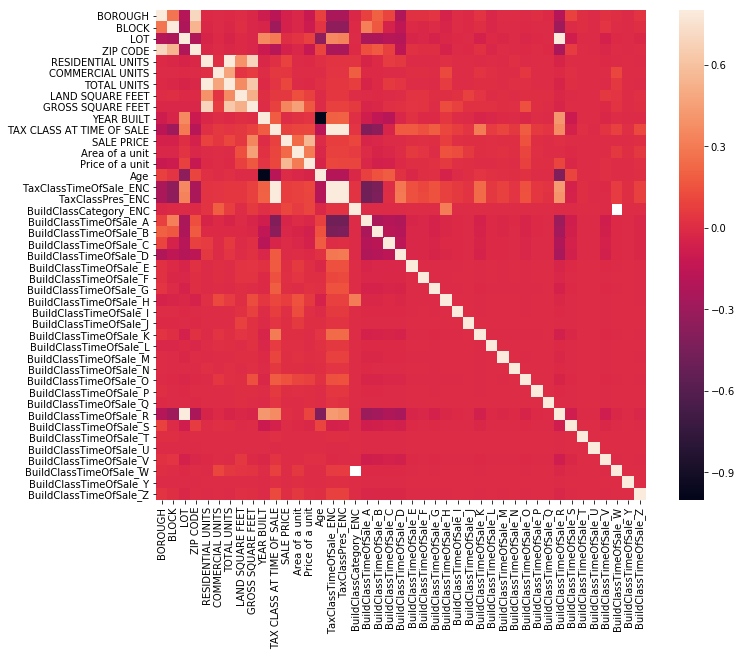

In [265]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [254]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'Area of a unit', 'Price of a unit', 'Age',
       'BUILDING CLASS CATEGORY NEW', 'TaxClassTimeOfSale_ENC',
       'TaxClassPres_ENC', 'BuildClassCategory_ENC', 'BuildClassTimeOfSale_A',
       'BuildClassTimeOfSale_B', 'BuildClassTimeOfSale_C',
       'BuildClassTimeOfSale_D', 'BuildClassTimeOfSale_E',
       'BuildClassTimeOfSale_F', 'BuildClassTimeOfSale_G',
       'BuildClassTimeOfSale_H', 'BuildClassTimeOfSale_I',
       'BuildClassTimeOfSale_J', 'BuildClassTimeOfSale_K',
       'BuildClassTimeOfSale_L', 'BuildClassTimeOfSale_M',
       'BuildClassTimeOfSale_N', 'BuildClassTimeOfSale_O',
       'BuildClassTimeOfSale_P', 'B

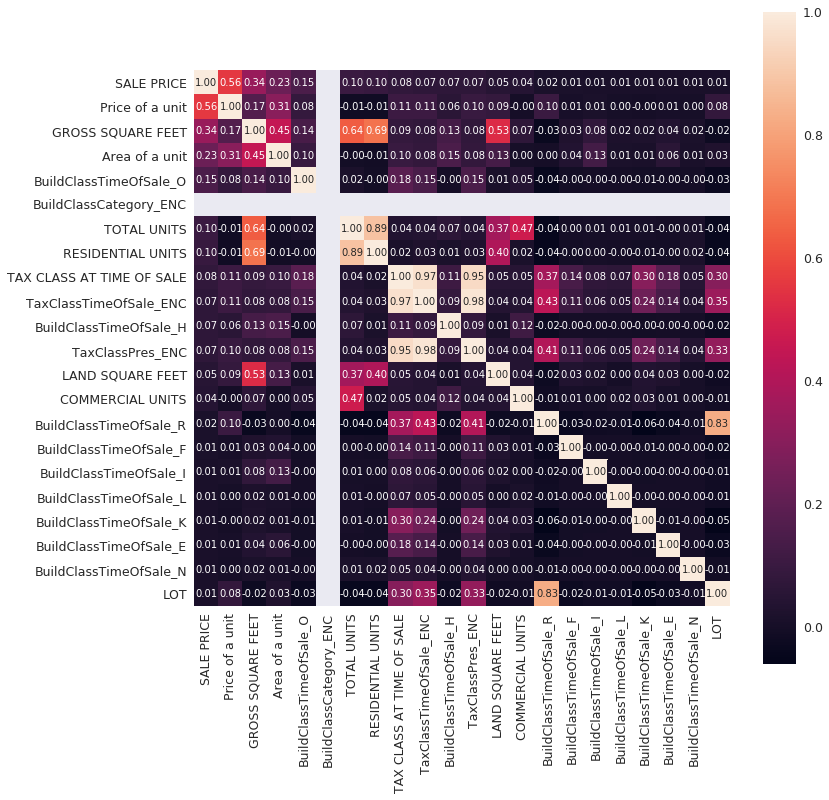

In [369]:
corrmat = data.corr()
plt.figure(figsize=(12,12))
# Top 20 Heatmap
k = 22 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SALE PRICE')['SALE PRICE'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [253]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [266]:
X = data[['BOROUGH', 'BLOCK', 'LOT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'Area of a unit', 'Price of a unit', 'Age',
       'TaxClassTimeOfSale_ENC',
       'TaxClassPres_ENC', 'BuildClassTimeOfSale_B', 'BuildClassTimeOfSale_C',
       'BuildClassTimeOfSale_D', 'BuildClassTimeOfSale_E',
       'BuildClassTimeOfSale_F', 'BuildClassTimeOfSale_G',
       'BuildClassTimeOfSale_H', 'BuildClassTimeOfSale_I',
       'BuildClassTimeOfSale_J', 'BuildClassTimeOfSale_K',
       'BuildClassTimeOfSale_L', 'BuildClassTimeOfSale_M',
       'BuildClassTimeOfSale_N', 'BuildClassTimeOfSale_O',
       'BuildClassTimeOfSale_P', 'BuildClassTimeOfSale_Q',
       'BuildClassTimeOfSale_R', 'BuildClassTimeOfSale_S',
       'BuildClassTimeOfSale_T', 'BuildClassTimeOfSale_U',
       'BuildClassTimeOfSale_V', 'BuildClassTimeOfSale_W',
       'BuildClassTimeOfSale_Y', 'BuildClassTimeOfSale_Z']].values

y = data['SALE PRICE'].values

# divide into training and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=15)

In [371]:
X = data[[
    'Price of a unit',
    'GROSS SQUARE FEET',
    'Area of a unit',
    'BuildClassTimeOfSale_O',
    'TOTAL UNITS',
    'COMMERCIAL UNITS',
    'RESIDENTIAL UNITS',
    'TAX CLASS AT TIME OF SALE',
    'TaxClassTimeOfSale_ENC',
    'BuildClassTimeOfSale_H',
    'TaxClassPres_ENC',
    'LAND SQUARE FEET',
    'BuildClassTimeOfSale_R',
    'BuildClassTimeOfSale_F',
    'BuildClassTimeOfSale_I',
    'BuildClassTimeOfSale_L',
    'BuildClassTimeOfSale_K',
    'BuildClassTimeOfSale_E',
    'BuildClassTimeOfSale_N',
    'LOT'
]].values

y = data['SALE PRICE'].values

# divide into training and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=15)

In [267]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=15)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
#df = pd.DataFrame({'pred':y_pred, 'test':y_test})
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(np.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test,y_pred))
#pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(rf_regressor.feature_importances_)

1690502.23709 54568.7456062
[  4.13631339e-05   3.85150871e-02   1.68243132e-02   1.00658447e-03
   4.95076872e-03   1.78466584e-01   4.78713022e-02   2.66271409e-03
   2.81976792e-01   1.76539962e-02   3.27815103e-01   7.88988901e-02
   7.65753940e-05   3.36486195e-06   5.13881727e-07   3.46491181e-05
   4.73051110e-06   2.10800596e-06   1.26633033e-03   1.36192734e-07
   1.26112877e-03   3.02518924e-08   1.40031026e-06   4.70629474e-06
   2.95904690e-09   7.09342204e-07   3.69104872e-06   4.15498194e-04
   5.49656709e-08   6.62508063e-18   4.33233730e-05   3.50626110e-05
   0.00000000e+00   0.00000000e+00   1.62055198e-04   4.14213171e-09
   0.00000000e+00   4.24866518e-07]


In [372]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=15)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
#df = pd.DataFrame({'pred':y_pred, 'test':y_test})
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(np.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test,y_pred))
#pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(rf_regressor.feature_importances_)

1250830.80633 43860.5407392
[  3.39911702e-01   4.32700378e-01   2.66367479e-02   3.68825419e-05
   1.19357803e-01   5.97232142e-02   6.50656537e-03   1.39166295e-06
   8.35665755e-05   1.94199702e-04   5.47680531e-03   8.72215859e-04
   1.70018327e-04   8.74953846e-08   1.48433118e-06   8.07542942e-07
   2.23170973e-06   6.91327490e-04   1.14271098e-08   7.63256040e-03]


In [282]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4,min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =15)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =15)

In [283]:
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
#df = pd.DataFrame({'pred':y_pred, 'test':y_test})
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(np.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test,y_pred))
#pd.set_option('display.float_format', lambda x: '%.1f' % x)
#print(rf_regressor.feature_importances_)

3622665.73961 615246.331319


/home/uditennam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [284]:
ENet.fit(X_train,y_train)
y_pred = ENet.predict(X_test)
#df = pd.DataFrame({'pred':y_pred, 'test':y_test})
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(np.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test,y_pred))
#pd.set_option('display.float_format', lambda x: '%.1f' % x)
#print(rf_regressor.feature_importances_)

3613630.43578 613425.76255


/home/uditennam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [286]:
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
#df = pd.DataFrame({'pred':y_pred, 'test':y_test})
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(np.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test,y_pred))
#pd.set_option('display.float_format', lambda x: '%.1f' % x)
#print(rf_regressor.feature_importances_)

3785230.07879 405397.461328


## We would love to improve our results, so, now we will check on the skewness of our features and try reducing the skewness using some data transformations

In [288]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter

In [289]:
data.skew()

BOROUGH                      -0.1
TAX CLASS AT PRESENT          1.5
BLOCK                         1.0
LOT                           3.5
ZIP CODE                     -0.4
RESIDENTIAL UNITS            61.0
COMMERCIAL UNITS            214.4
TOTAL UNITS                  63.6
LAND SQUARE FEET             88.4
GROSS SQUARE FEET            72.7
YEAR BUILT                    0.3
TAX CLASS AT TIME OF SALE     1.5
SALE PRICE                  136.5
Area of a unit              109.3
Price of a unit              68.5
Age                          -0.3
TaxClassTimeOfSale_ENC        0.6
TaxClassPres_ENC              0.6
BuildClassCategory_ENC       83.9
BuildClassTimeOfSale_A        1.4
BuildClassTimeOfSale_B        1.7
BuildClassTimeOfSale_C        2.3
BuildClassTimeOfSale_D        1.9
BuildClassTimeOfSale_E       16.0
BuildClassTimeOfSale_F       20.4
BuildClassTimeOfSale_G       10.5
BuildClassTimeOfSale_H       25.8
BuildClassTimeOfSale_I       37.8
BuildClassTimeOfSale_J       83.9
BuildClassTime


 mu = 1240016.09 and sigma = 10373116.43



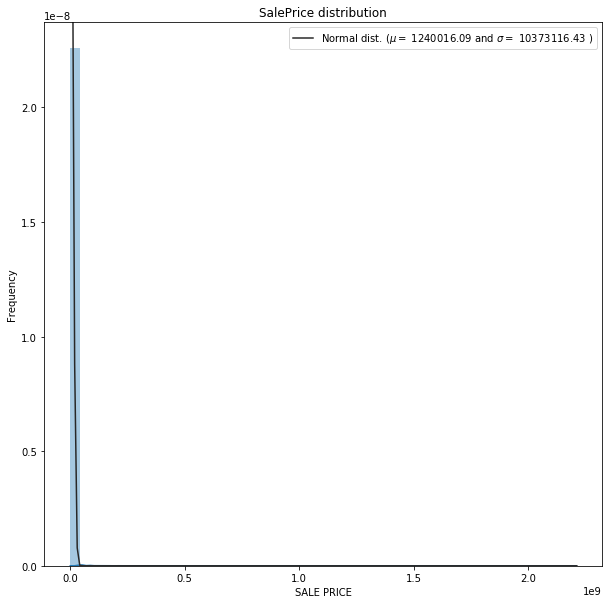

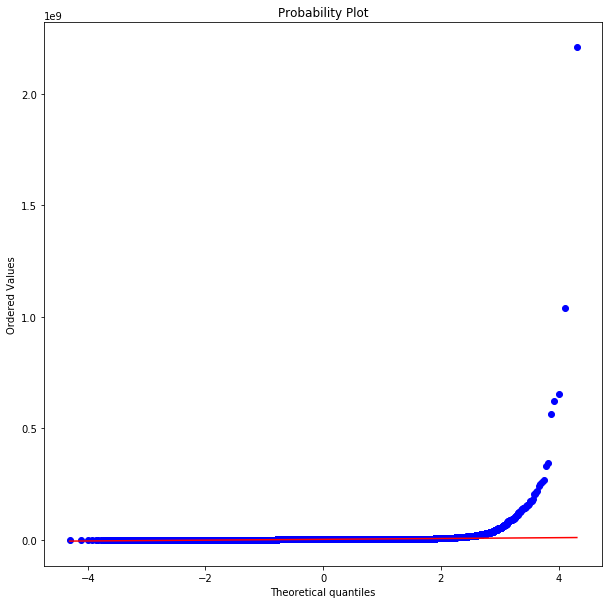

Skewness: 136.545088
Kurtosis: 26003.603052


In [290]:
# Plot Histogram
fig = plt.figure(figsize=(10,10))
sns.distplot(data['SALE PRICE'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SALE PRICE'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(data['SALE PRICE'], plot=plt)
plt.show()

print("Skewness: %f" % data['SALE PRICE'].skew())
print("Kurtosis: %f" % data['SALE PRICE'].kurt())


 mu = 13.25 and sigma = 1.53



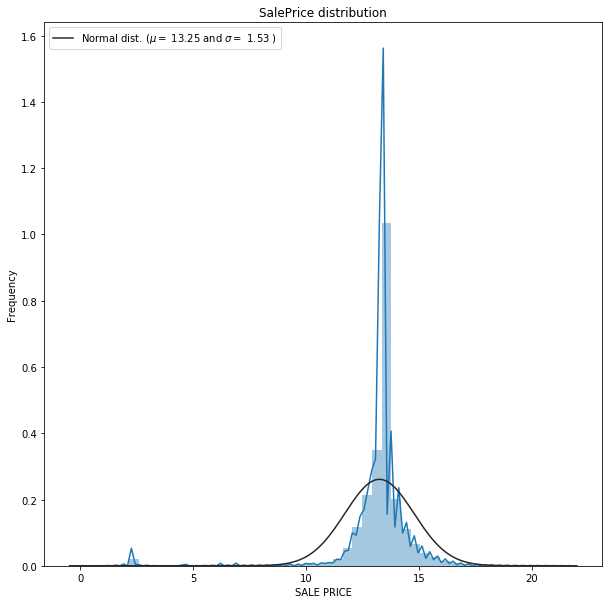

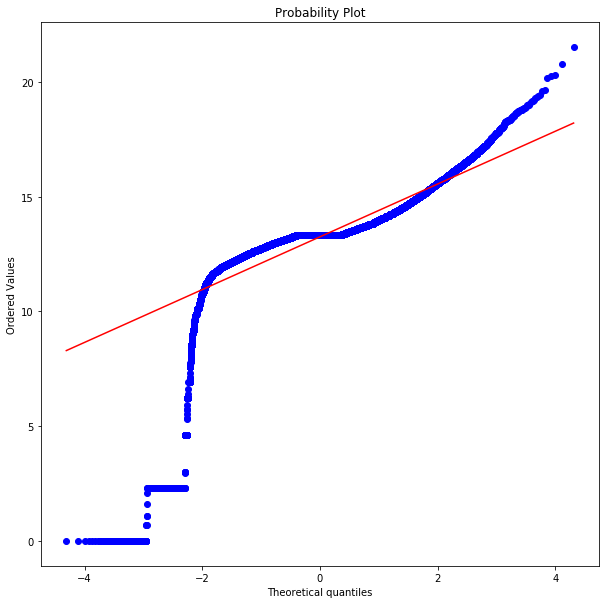

Skewness: -4.618342
Kurtosis: 33.081149


In [293]:
# Plot Histogram
fig = plt.figure(figsize=(10,10))
sns.distplot(np.log(data['SALE PRICE']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log(data['SALE PRICE']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(np.log(data['SALE PRICE']), plot=plt)
plt.show()

print("Skewness: %f" % np.log(data['SALE PRICE']).skew())
print("Kurtosis: %f" % np.log(data['SALE PRICE']).kurt())


 mu = 894.02 and sigma = 663.89



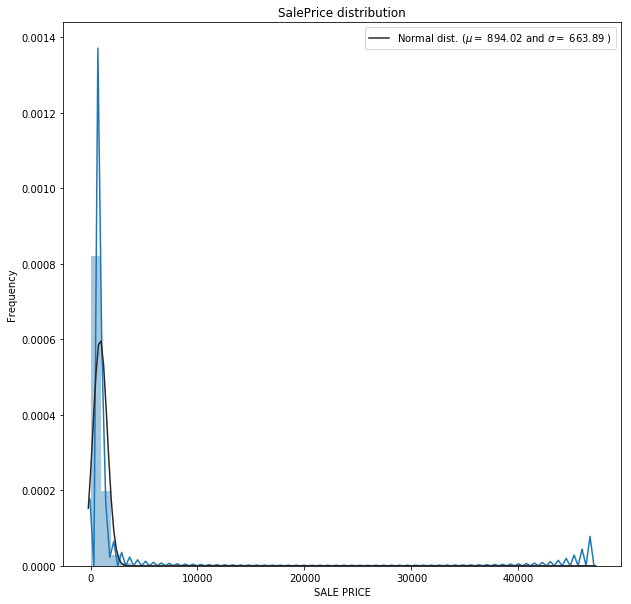

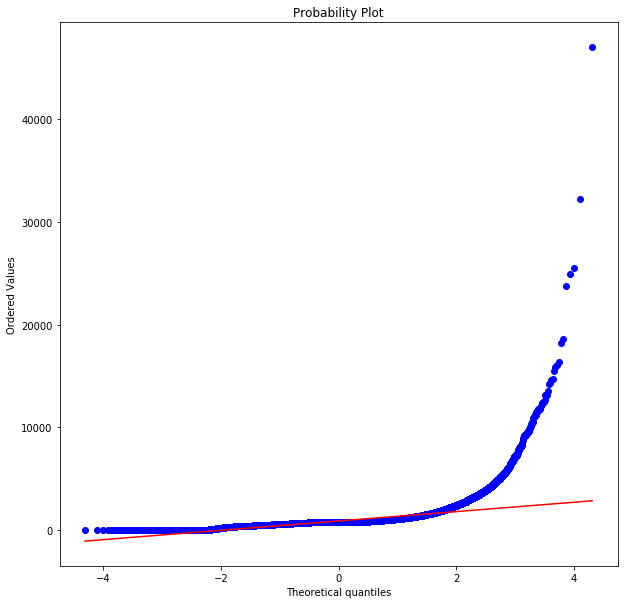

Skewness: 12.968161
Kurtosis: 474.833011


In [294]:
fig = plt.figure(figsize=(10,10))
sns.distplot(np.sqrt(data['SALE PRICE']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.sqrt(data['SALE PRICE']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(np.sqrt(data['SALE PRICE']), plot=plt)
plt.show()

print("Skewness: %f" % np.sqrt(data['SALE PRICE']).skew())
print("Kurtosis: %f" % np.sqrt(data['SALE PRICE']).kurt())


 mu = 89.82 and sigma = 34.85



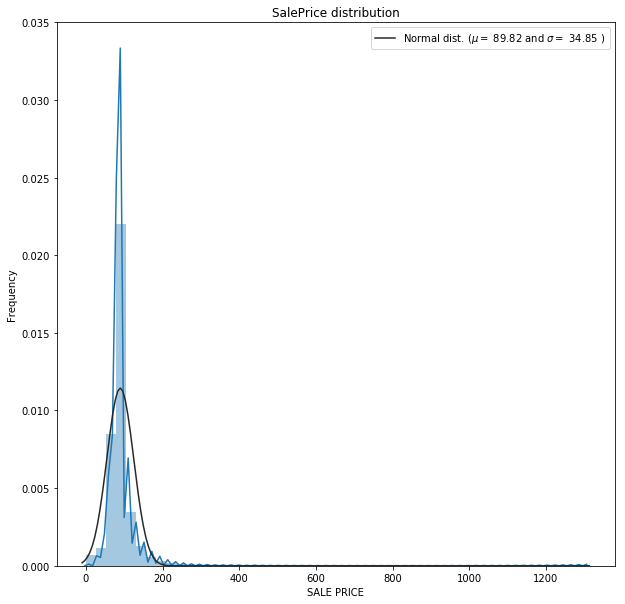

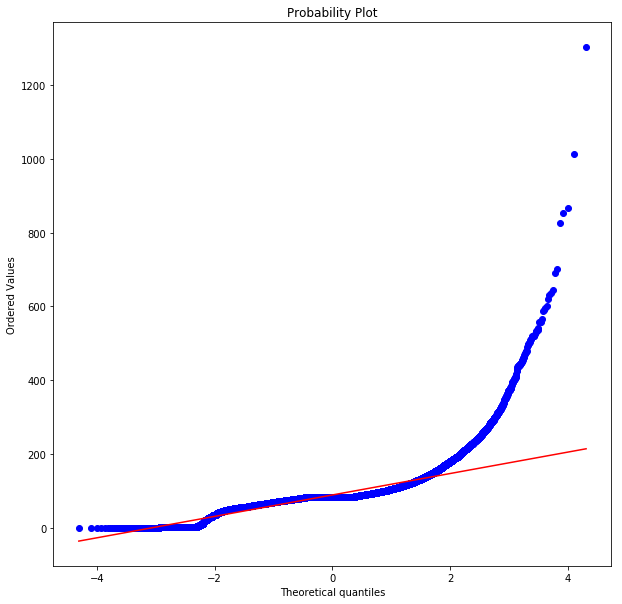

Skewness: 4.443765
Kurtosis: 59.522243


In [295]:
fig = plt.figure(figsize=(10,10))
sns.distplot(np.cbrt(data['SALE PRICE']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.cbrt(data['SALE PRICE']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(np.cbrt(data['SALE PRICE']), plot=plt)
plt.show()

print("Skewness: %f" % np.cbrt(data['SALE PRICE']).skew())
print("Kurtosis: %f" % np.cbrt(data['SALE PRICE']).kurt())


 mu = 42.95 and sigma = 8.36



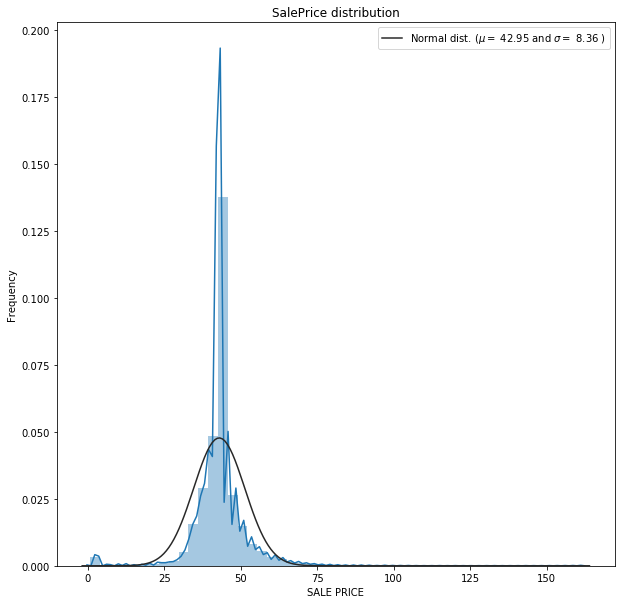

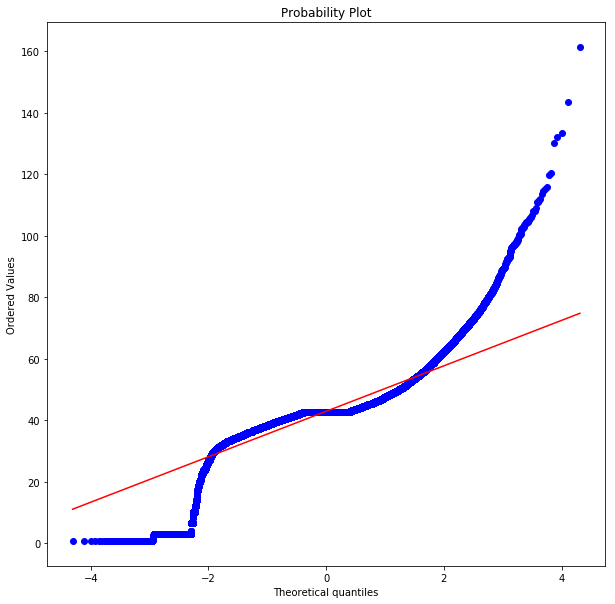

Skewness: -0.122061
Kurtosis: 11.593632


In [305]:
from scipy.special import boxcox1p
lam = 0.15 # we put in values and check for the best possible skewness and kurtosis values

fig = plt.figure(figsize=(10,10))
sns.distplot(boxcox1p(data['SALE PRICE'],lam), fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(boxcox1p(data['SALE PRICE'],lam))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(boxcox1p(data['SALE PRICE'],lam), plot=plt)
plt.show()

print("Skewness: %f" % boxcox1p(data['SALE PRICE'],lam).skew())
print("Kurtosis: %f" % boxcox1p(data['SALE PRICE'],lam).kurt())

In [306]:
# we will look at features having more than abs(1) for reducing the skewness and applying our transform

In [307]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'Area of a unit', 'Price of a unit', 'Age',
       'BUILDING CLASS CATEGORY NEW', 'TaxClassTimeOfSale_ENC',
       'TaxClassPres_ENC', 'BuildClassCategory_ENC', 'BuildClassTimeOfSale_A',
       'BuildClassTimeOfSale_B', 'BuildClassTimeOfSale_C',
       'BuildClassTimeOfSale_D', 'BuildClassTimeOfSale_E',
       'BuildClassTimeOfSale_F', 'BuildClassTimeOfSale_G',
       'BuildClassTimeOfSale_H', 'BuildClassTimeOfSale_I',
       'BuildClassTimeOfSale_J', 'BuildClassTimeOfSale_K',
       'BuildClassTimeOfSale_L', 'BuildClassTimeOfSale_M',
       'BuildClassTimeOfSale_N', 'BuildClassTimeOfSale_O',
       'BuildClassTimeOfSale_P', 'B

In [310]:
data.skew()

BOROUGH                      -0.1
TAX CLASS AT PRESENT          1.5
BLOCK                         1.0
LOT                           3.5
ZIP CODE                     -0.4
RESIDENTIAL UNITS            61.0
COMMERCIAL UNITS            214.4
TOTAL UNITS                  63.6
LAND SQUARE FEET             88.4
GROSS SQUARE FEET            72.7
YEAR BUILT                    0.3
TAX CLASS AT TIME OF SALE     1.5
SALE PRICE                  136.5
Area of a unit              109.3
Price of a unit              68.5
Age                          -0.3
TaxClassTimeOfSale_ENC        0.6
TaxClassPres_ENC              0.6
BuildClassCategory_ENC       83.9
BuildClassTimeOfSale_A        1.4
BuildClassTimeOfSale_B        1.7
BuildClassTimeOfSale_C        2.3
BuildClassTimeOfSale_D        1.9
BuildClassTimeOfSale_E       16.0
BuildClassTimeOfSale_F       20.4
BuildClassTimeOfSale_G       10.5
BuildClassTimeOfSale_H       25.8
BuildClassTimeOfSale_I       37.8
BuildClassTimeOfSale_J       83.9
BuildClassTime

In [314]:
# we don't want to lose our earlier data, so we create another dataframe
data_2=data[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'Area of a unit', 'Price of a unit', 'Age',
       'BUILDING CLASS CATEGORY NEW', 'TaxClassTimeOfSale_ENC',
       'TaxClassPres_ENC', 'BuildClassCategory_ENC', 'BuildClassTimeOfSale_A',
       'BuildClassTimeOfSale_B', 'BuildClassTimeOfSale_C',
       'BuildClassTimeOfSale_D', 'BuildClassTimeOfSale_E',
       'BuildClassTimeOfSale_F', 'BuildClassTimeOfSale_G',
       'BuildClassTimeOfSale_H', 'BuildClassTimeOfSale_I',
       'BuildClassTimeOfSale_J', 'BuildClassTimeOfSale_K',
       'BuildClassTimeOfSale_L', 'BuildClassTimeOfSale_M',
       'BuildClassTimeOfSale_N', 'BuildClassTimeOfSale_O',
       'BuildClassTimeOfSale_P', 'BuildClassTimeOfSale_Q',
       'BuildClassTimeOfSale_R', 'BuildClassTimeOfSale_S',
       'BuildClassTimeOfSale_T', 'BuildClassTimeOfSale_U',
       'BuildClassTimeOfSale_V', 'BuildClassTimeOfSale_W',
       'BuildClassTimeOfSale_Y', 'BuildClassTimeOfSale_Z']]

In [315]:
# we wont't look at standardizing or normalizing numeric values, as the distribution of the dataset is not Gaussian

In [317]:
numeric_feats = data_2.dtypes[data_2.dtypes != "object"].index

# Check the skew of all numerical features
data_2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
#skewness

COMMERCIAL UNITS            214.4
BuildClassTimeOfSale_Y      205.6
BuildClassTimeOfSale_T      205.6
BuildClassTimeOfSale_U      145.4
SALE PRICE                  136.5
Area of a unit              109.3
LAND SQUARE FEET             88.4
BuildClassTimeOfSale_J       83.9
BuildClassCategory_ENC       83.9
BuildClassTimeOfSale_Q       77.7
GROSS SQUARE FEET            72.7
Price of a unit              68.5
TOTAL UNITS                  63.6
RESIDENTIAL UNITS            61.0
BuildClassTimeOfSale_N       58.1
BuildClassTimeOfSale_P       51.4
BuildClassTimeOfSale_L       42.8
BuildClassTimeOfSale_I       37.8
BuildClassTimeOfSale_W       35.0
BuildClassTimeOfSale_M       29.0
BuildClassTimeOfSale_H       25.8
BuildClassTimeOfSale_Z       22.0
BuildClassTimeOfSale_F       20.4
BuildClassTimeOfSale_E       16.0
BuildClassTimeOfSale_O       15.4
BuildClassTimeOfSale_G       10.5
BuildClassTimeOfSale_K        9.4
BuildClassTimeOfSale_V        6.8
BuildClassTimeOfSale_S        6.5
LOT           

In [318]:
numeric_feats = data_2.dtypes[data_2.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data_2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
COMMERCIAL UNITS,214.4
BuildClassTimeOfSale_Y,205.6
BuildClassTimeOfSale_T,205.6
BuildClassTimeOfSale_U,145.4
SALE PRICE,136.5
Area of a unit,109.3
LAND SQUARE FEET,88.4
BuildClassTimeOfSale_J,83.9
BuildClassCategory_ENC,83.9
BuildClassTimeOfSale_Q,77.7



 mu = 0.19 and sigma = 8.71



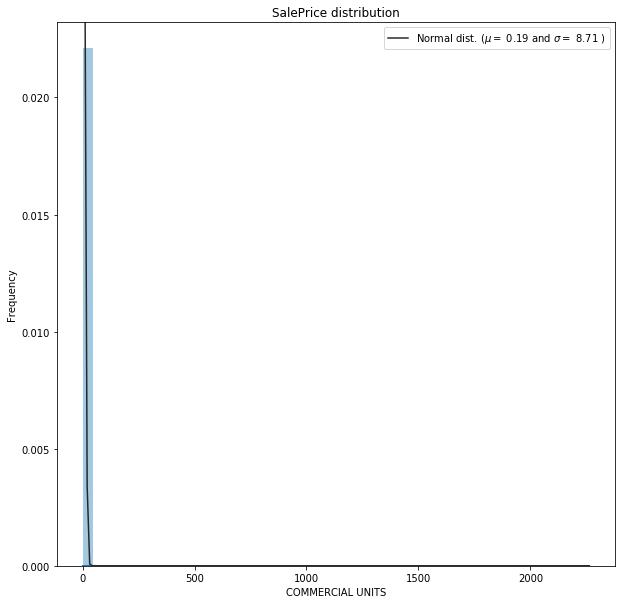

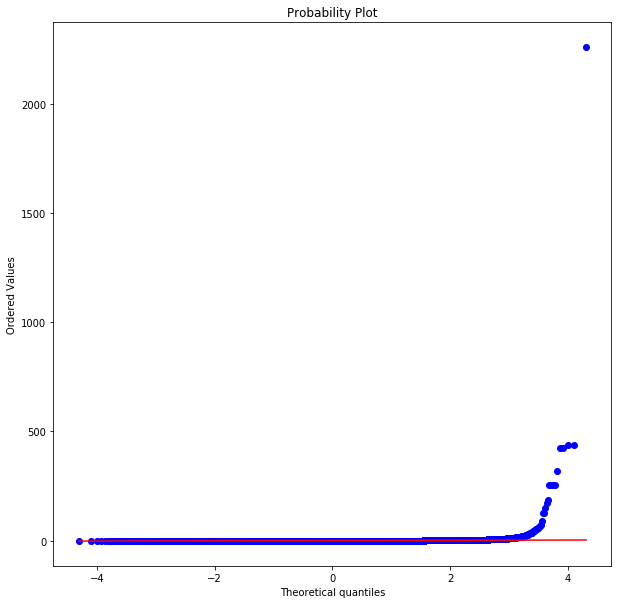

Skewness: 214.401123
Kurtosis: 53950.592791


In [319]:
fig = plt.figure(figsize=(10,10))
sns.distplot(data_2['COMMERCIAL UNITS'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_2['COMMERCIAL UNITS'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(data_2['COMMERCIAL UNITS'], plot=plt)
plt.show()

print("Skewness: %f" % data_2['COMMERCIAL UNITS'].skew())
print("Kurtosis: %f" % data_2['COMMERCIAL UNITS'].kurt())


 mu = 3499.97 and sigma = 28749.40



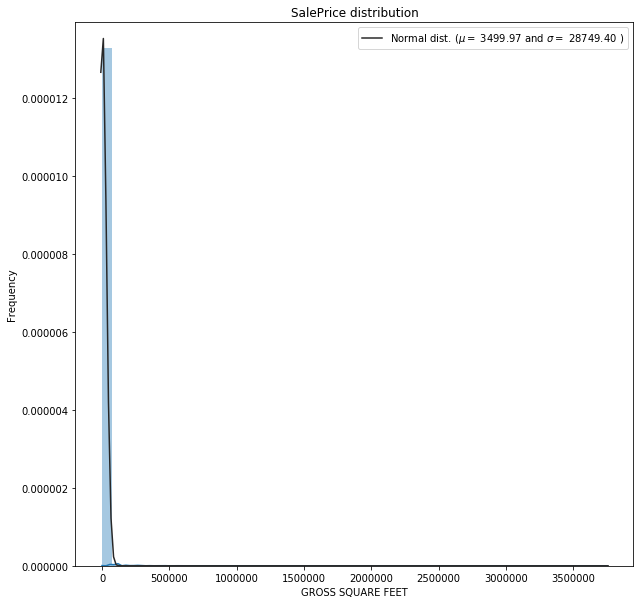

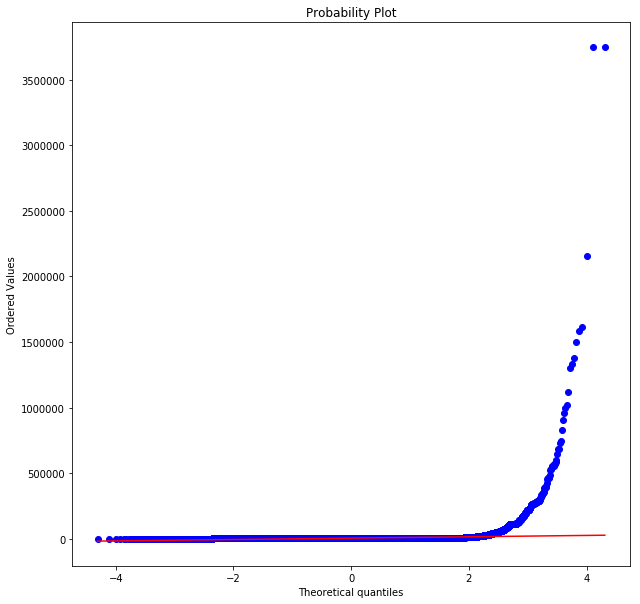

Skewness: 72.719432
Kurtosis: 7824.543892


In [320]:
fig = plt.figure(figsize=(10,10))
sns.distplot(data_2['GROSS SQUARE FEET'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_2['GROSS SQUARE FEET'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(data_2['GROSS SQUARE FEET'], plot=plt)
plt.show()

print("Skewness: %f" % data_2['GROSS SQUARE FEET'].skew())
print("Kurtosis: %f" % data_2['GROSS SQUARE FEET'].kurt())


 mu = 0.58 and sigma = 0.63



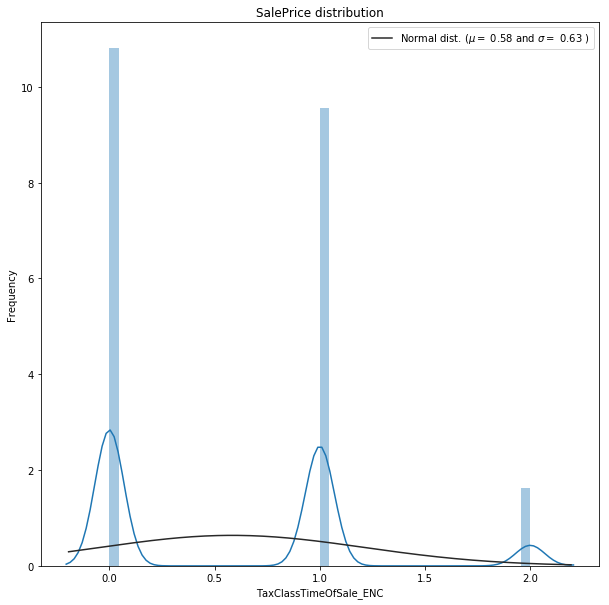

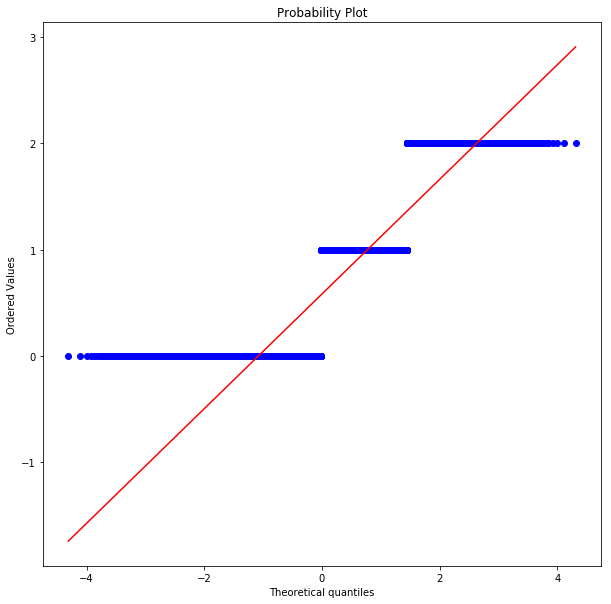

Skewness: 0.593703
Kurtosis: -0.592247


In [322]:
fig = plt.figure(figsize=(10,10))
sns.distplot(data_2['TaxClassTimeOfSale_ENC'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_2['TaxClassTimeOfSale_ENC'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(data_2['TaxClassTimeOfSale_ENC'], plot=plt)
plt.show()

print("Skewness: %f" % data_2['TaxClassTimeOfSale_ENC'].skew())
print("Kurtosis: %f" % data_2['TaxClassTimeOfSale_ENC'].kurt())


 mu = 0.25 and sigma = 0.43



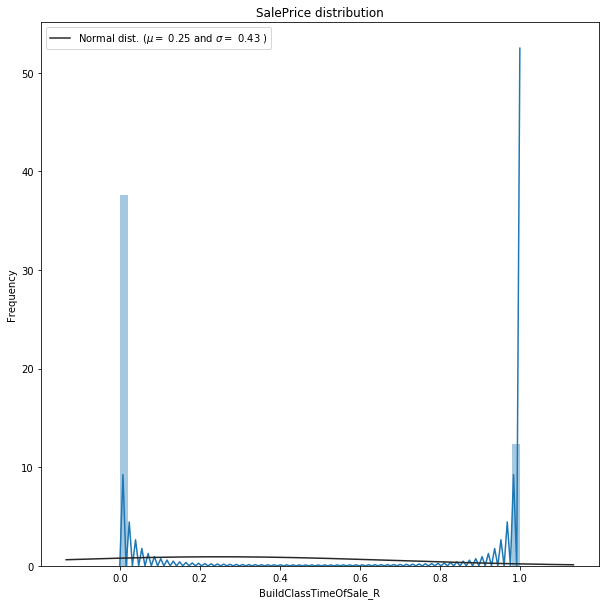

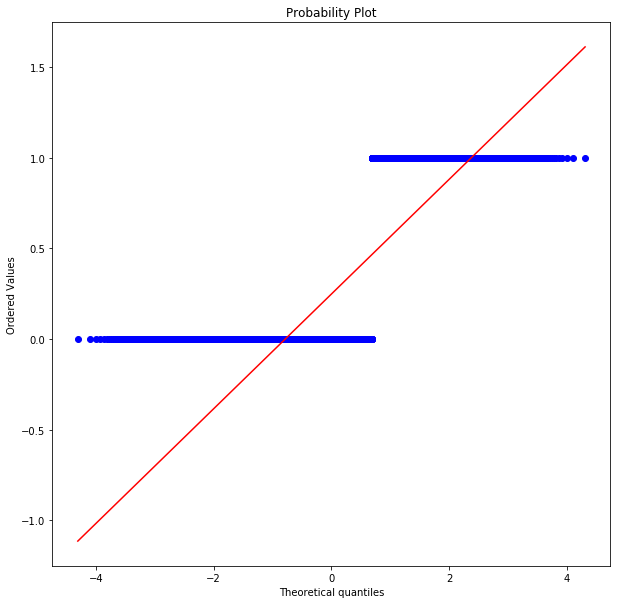

Skewness: 1.166787
Kurtosis: -0.638623


In [326]:
fig = plt.figure(figsize=(10,10))
sns.distplot(data_2['BuildClassTimeOfSale_R'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_2['BuildClassTimeOfSale_R'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = stats.probplot(data_2['BuildClassTimeOfSale_R'], plot=plt)
plt.show()

print("Skewness: %f" % data_2['BuildClassTimeOfSale_R'].skew())
print("Kurtosis: %f" % data_2['BuildClassTimeOfSale_R'].kurt())

In [324]:
data_2.skew()

BOROUGH                      -0.1
TAX CLASS AT PRESENT          1.5
BLOCK                         1.0
LOT                           3.5
ZIP CODE                     -0.4
RESIDENTIAL UNITS            61.0
COMMERCIAL UNITS            214.4
TOTAL UNITS                  63.6
LAND SQUARE FEET             88.4
GROSS SQUARE FEET            72.7
YEAR BUILT                    0.3
TAX CLASS AT TIME OF SALE     1.5
SALE PRICE                  136.5
Area of a unit              109.3
Price of a unit              68.5
Age                          -0.3
TaxClassTimeOfSale_ENC        0.6
TaxClassPres_ENC              0.6
BuildClassCategory_ENC       83.9
BuildClassTimeOfSale_A        1.4
BuildClassTimeOfSale_B        1.7
BuildClassTimeOfSale_C        2.3
BuildClassTimeOfSale_D        1.9
BuildClassTimeOfSale_E       16.0
BuildClassTimeOfSale_F       20.4
BuildClassTimeOfSale_G       10.5
BuildClassTimeOfSale_H       25.8
BuildClassTimeOfSale_I       37.8
BuildClassTimeOfSale_J       83.9
BuildClassTime

In [327]:
# We will only apply boxcox to continuous variables, whose abs(skewness) > 1
skewness

,Skewed Features
COMMERCIAL UNITS,214.4
BuildClassTimeOfSale_Y,205.6
BuildClassTimeOfSale_T,205.6
BuildClassTimeOfSale_U,145.4
SALE PRICE,136.5
Area of a unit,109.3
LAND SQUARE FEET,88.4
BuildClassTimeOfSale_J,83.9
BuildClassCategory_ENC,83.9
BuildClassTimeOfSale_Q,77.7


In [331]:
data_2['COMMERCIAL UNITS'] = boxcox1p(data_2['COMMERCIAL UNITS'], lam)
data_2['SALE PRICE'] = boxcox1p(data_2['SALE PRICE'], lam)
data_2['Area of a unit'] = boxcox1p(data_2['Area of a unit'], lam)
data_2['LAND SQUARE FEET'] = boxcox1p(data_2['LAND SQUARE FEET'], lam)
data_2['GROSS SQUARE FEET'] = boxcox1p(data_2['GROSS SQUARE FEET'], lam)
data_2['Price of a unit'] = boxcox1p(data_2['Price of a unit'], lam)
data_2['TOTAL UNITS'] = boxcox1p(data_2['TOTAL UNITS'], lam)
data_2['RESIDENTIAL UNITS'] = boxcox1p(data_2['RESIDENTIAL UNITS'], lam)
data_2['LOT'] = boxcox1p(data_2['LOT'], lam)

In [333]:
data_2.skew()

BOROUGH                      -0.1
TAX CLASS AT PRESENT          1.5
BLOCK                         1.0
LOT                           0.6
ZIP CODE                     -0.4
RESIDENTIAL UNITS             6.2
COMMERCIAL UNITS             10.4
TOTAL UNITS                   5.8
LAND SQUARE FEET              5.4
GROSS SQUARE FEET             5.5
YEAR BUILT                    0.3
TAX CLASS AT TIME OF SALE     1.5
SALE PRICE                   -0.1
Area of a unit                3.7
Price of a unit              -0.4
Age                          -0.3
TaxClassTimeOfSale_ENC        0.6
TaxClassPres_ENC              0.6
BuildClassCategory_ENC       83.9
BuildClassTimeOfSale_A        1.4
BuildClassTimeOfSale_B        1.7
BuildClassTimeOfSale_C        2.3
BuildClassTimeOfSale_D        1.9
BuildClassTimeOfSale_E       16.0
BuildClassTimeOfSale_F       20.4
BuildClassTimeOfSale_G       10.5
BuildClassTimeOfSale_H       25.8
BuildClassTimeOfSale_I       37.8
BuildClassTimeOfSale_J       83.9
BuildClassTime

In [336]:
len(data_2.columns)

49

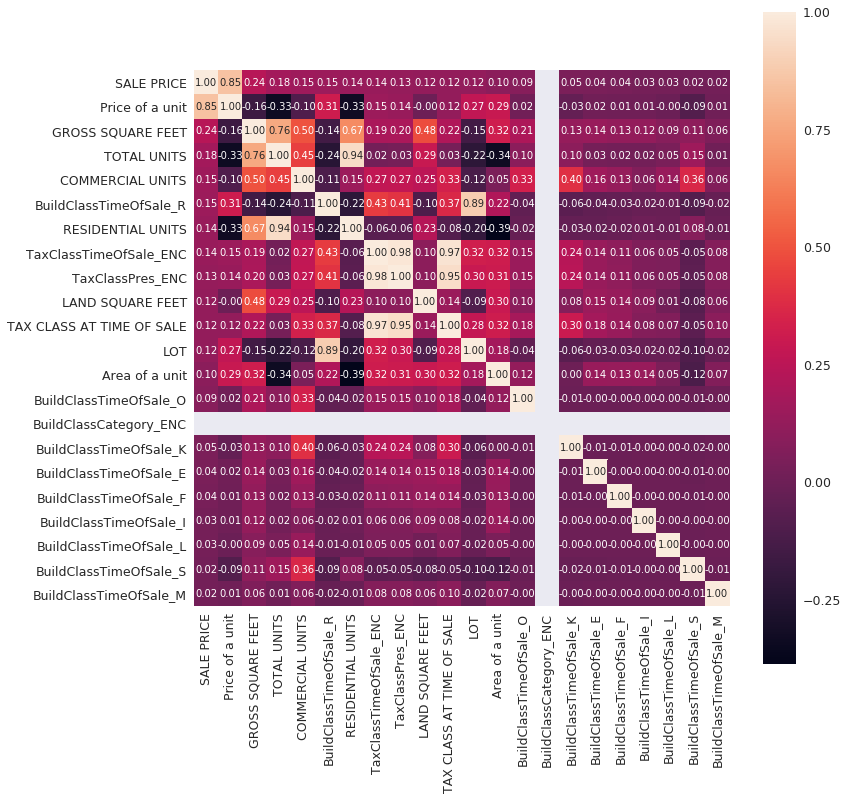

In [338]:
corrmat = data_2.corr()
plt.figure(figsize=(12,12))
# Top 20 Heatmap
k = 22 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SALE PRICE')['SALE PRICE'].index
cm = np.corrcoef(data_2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [359]:
X = data_2[[
    'GROSS SQUARE FEET',
    'Price of a unit',
    'TOTAL UNITS',
    'COMMERCIAL UNITS',
    'RESIDENTIAL UNITS',
    'BuildClassTimeOfSale_R',
    'TaxClassTimeOfSale_ENC',
    'TaxClassPres_ENC',
    'LAND SQUARE FEET',
    'TAX CLASS AT TIME OF SALE',
    'LOT',
    'Area of a unit',
    'BuildClassTimeOfSale_O',
    'BuildClassTimeOfSale_K',
    'BuildClassTimeOfSale_E',
    'BuildClassTimeOfSale_F',
    'BuildClassTimeOfSale_I',
    'BuildClassTimeOfSale_L',
    'BuildClassTimeOfSale_S',
    'BuildClassTimeOfSale_M'
]].values

y = data_2['SALE PRICE'].values

# divide into training and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=15)

In [361]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=15)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
#df = pd.DataFrame({'pred':y_pred, 'test':y_test})
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(np.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test,y_pred))
#pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(rf_regressor.feature_importances_)

0.211765329239 0.0210051950914
[  3.22764046e-03   8.19951411e-01   1.70894320e-01   1.43505810e-03
   3.19033708e-03   2.65123035e-06   9.40903593e-05   9.67783812e-06
   6.47913656e-04   5.14331875e-06   3.67303608e-04   1.27833591e-04
   1.03535935e-05   1.03261450e-05   1.18878580e-05   1.23937989e-05
   1.51358193e-07   1.10783181e-07   9.98254059e-07   3.97006557e-07]


In [362]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=15).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [365]:
score = rmsle_cv(rf_regressor)
print("\nRandomForest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandomForest score: 0.3886 (0.0913)



In [ ]:
# Evaluated the GradientBoostingRegressor and XGB too, but the RandomForest dominates them

### Thank you!

# Udit Ennam                                                               